In [1]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support, f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import pickle

In [2]:
#0, 1, 2
multi_names = ['Hate', 'Neutral', 'Offensive']
#0, 1
binary_names = ["Non-Hate", "Hate"]

In [3]:
with open('../../hatexplain_data.pickle', 'rb') as file:
    data = pickle.load(file)

In [4]:
y_train = data["y_train"]
y_test = data["y_test"]
y_train_binary = data["y_train_binary"]
y_test_binary = data["y_test_binary"]

<h4> Doc2Vec training and testing variables</h4>

In [5]:
with open('../../saved_embeddings/d2v_embeddings.pickle', 'rb') as file:
    data = pickle.load(file)

In [6]:
X_train_d2v = data["X_train_d2v"]
X_test_d2v = data["X_test_d2v"]

<h1>Doc2Vec SVM Model</h1>

<h3>Variance in performance</h3> 

In [7]:
svm_classifier = SVC(random_state=42)

In [ ]:
#Using validation set to test for variance in accuracy results using k fold validation

# stratified_10_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
# cross_val_scores = cross_val_score(svm_classifier, train_X, train_y, cv=stratified_10_fold, scoring='accuracy')
# accuracy_variance = np.var(cross_val_scores)

# # Print the accuracy scores for each fold
# print("Accuracy scores for each fold:", cross_val_scores)

# # Print the variance of the accuracy scores
# print("Variance in accuracy scores:", accuracy_variance)

<h3>Final Classifier</h3>

In [8]:
svm_classifier.fit(X_train_d2v, y_train)

SVC(random_state=42)

In [9]:
# Prediciting document labels for test data
y_svm_pred_d2v = svm_classifier.predict(X_test_d2v)

svm_report = classification_report(y_test, y_svm_pred_d2v, target_names=multi_names)
print("Report: \n", svm_report)

Report: 
               precision    recall  f1-score   support

        Hate       0.60      0.58      0.59      1187
     Neutral       0.56      0.78      0.65      1563
   Offensive       0.52      0.25      0.34      1096

    accuracy                           0.57      3846
   macro avg       0.56      0.53      0.53      3846
weighted avg       0.56      0.57      0.54      3846



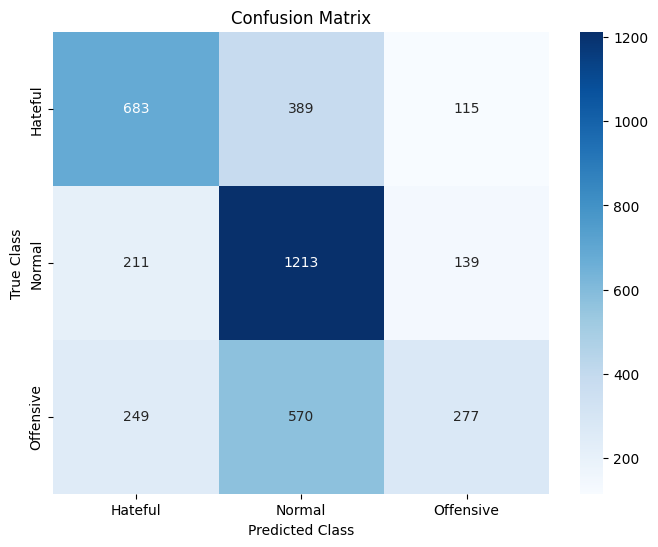

In [11]:
# Generate the confusion matrix


cm = confusion_matrix(y_test, y_svm_pred_d2v)

# Display the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=multi_names, yticklabels=multi_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()